# Assignment 3 (Hotel Reservation)

* Possible points: 100

* Rename the .ipynb notebook as Assignment_3_{FirstName}_{LastName}.ipynb before submitting your notebook. Eg. Assignment_3_Vijay_Koju.ipynb

* Due Date: 05/01/2023 11:59pm

* Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

##### Include the following information:

* Name:Vinh Huynh
* UTD ID:vxh210013
* Email:vxh210013@utdallas.edu

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Data Description
The data contains different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not. (This is the target column that we'd want to be able to predict). Use 'Canceled' as positive class and 'Not_Canceled' as negative class.

## Importing necessary libraries and data

In [28]:
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
    balanced_accuracy_score,
    roc_auc_score,
    roc_curve
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    pred = model.predict_proba(predictors)[:,1] > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    b_acc = balanced_accuracy_score(target, pred) # balanced accuracy: average of recall obtained on each class
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    auc = roc_auc_score(target, model.predict_proba(predictors)[:,1])

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Balanced Accuracy": b_acc,
                            "Recall": recall, "Precision": precision,
                            "F1": f1, "AUC": auc}, index=[0],)
    return df_perf

In [4]:
df = pd.read_csv("C:/Users/tuanv/Downloads/Hotel_reservation.csv")

## 1) Perform Exploratory Data Analysis (EDA) and state your observations. (10 points)

In [5]:

df["required_car_parking_space"] = df["required_car_parking_space"].astype("category")
df["repeated_guest"] = df["repeated_guest"].astype("category")

In [6]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  object  
 6   required_car_parking_space            36275 non-null  category
 7   room_type_reserved                    36275 non-null  object  
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

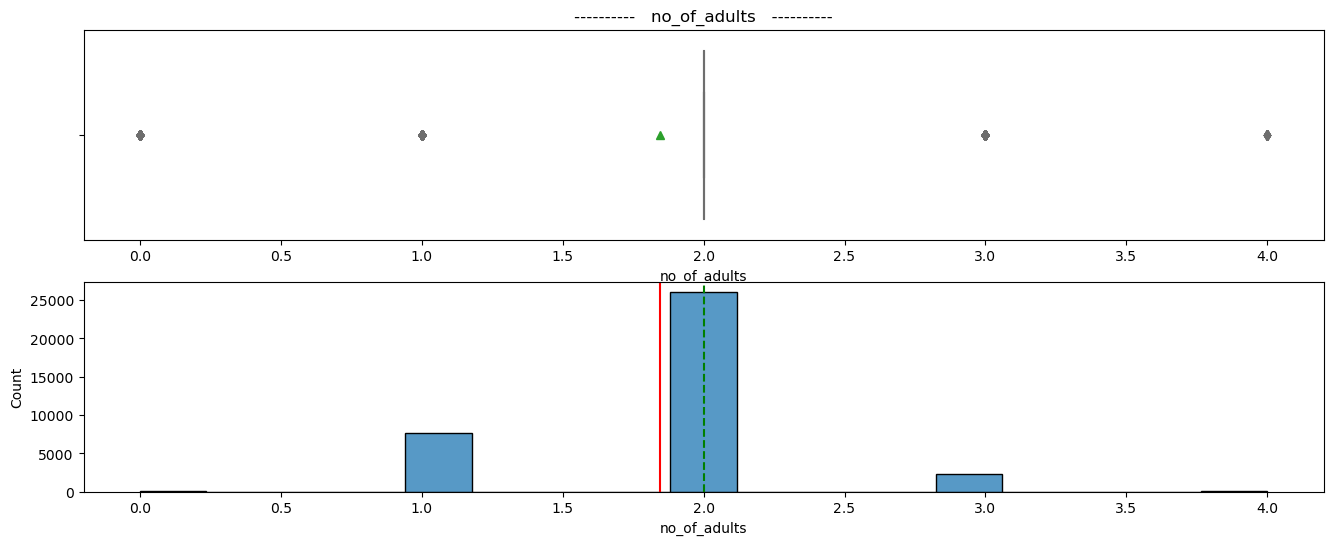

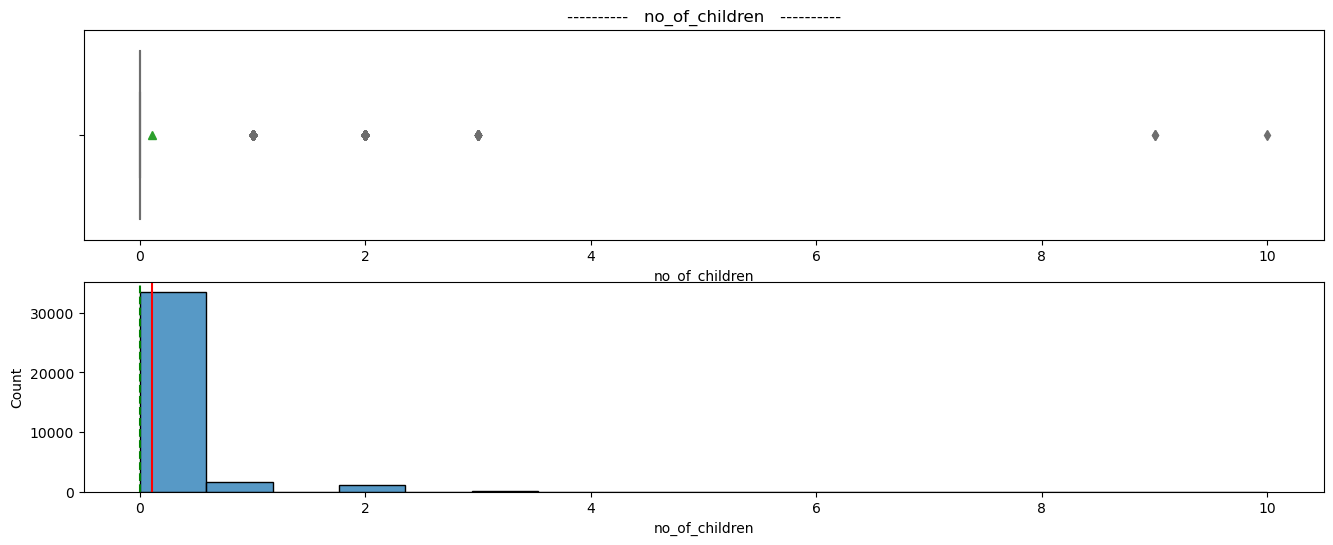

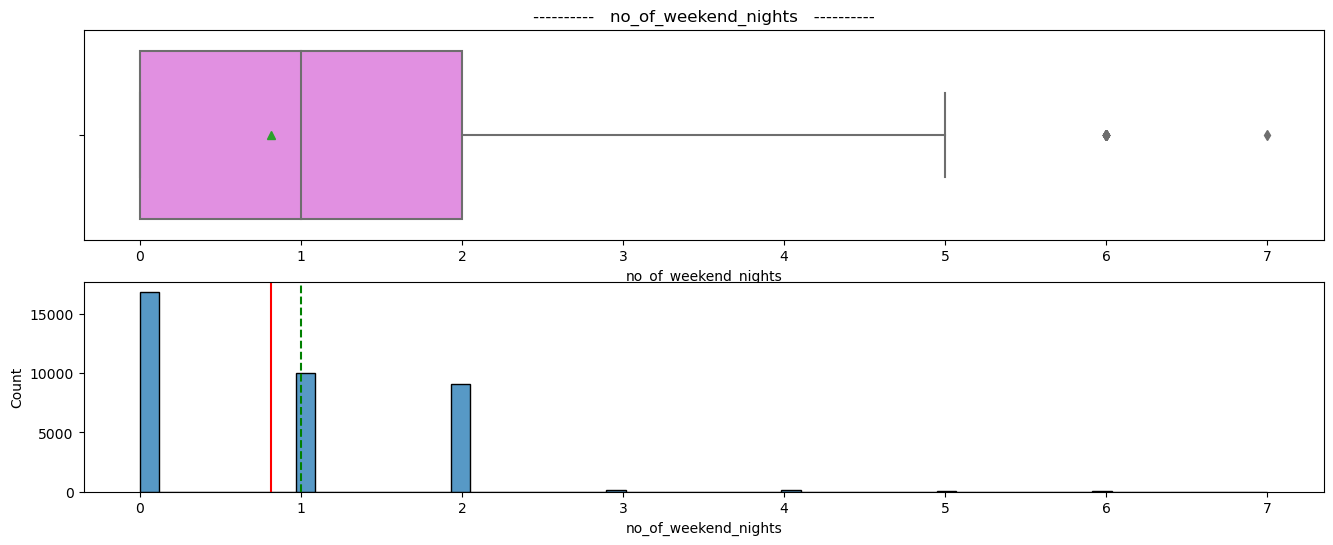

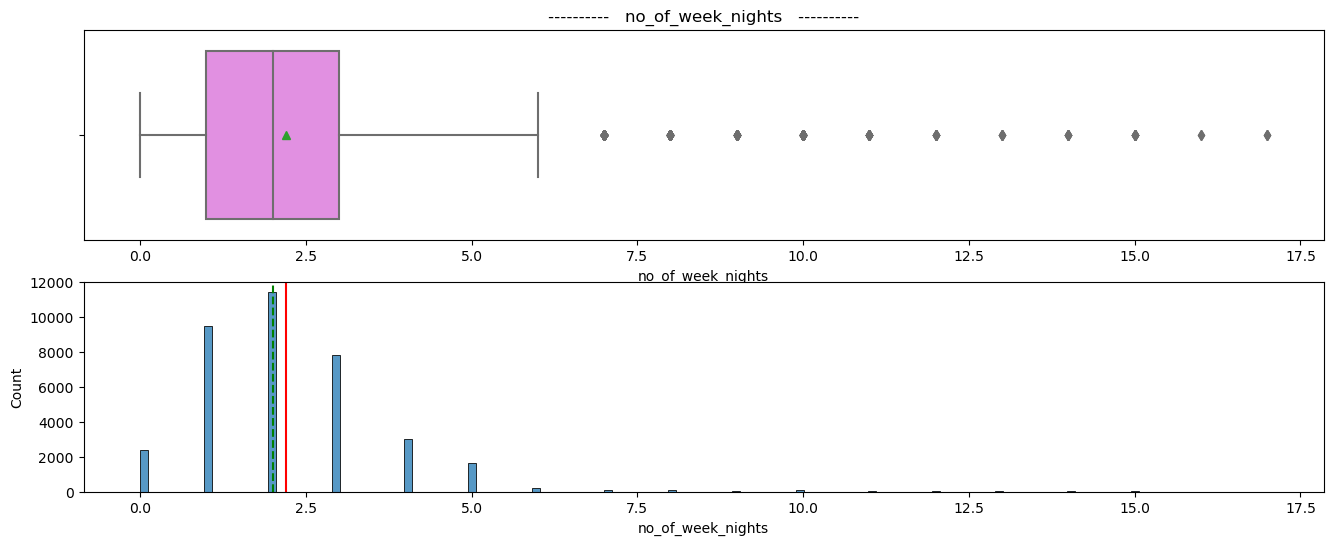

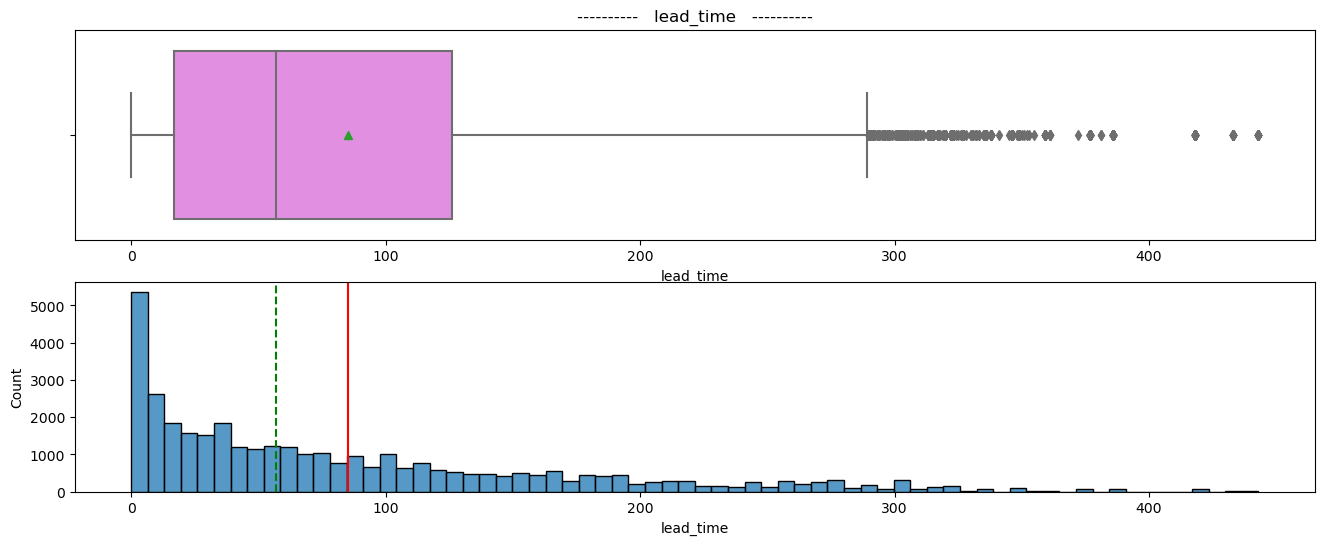

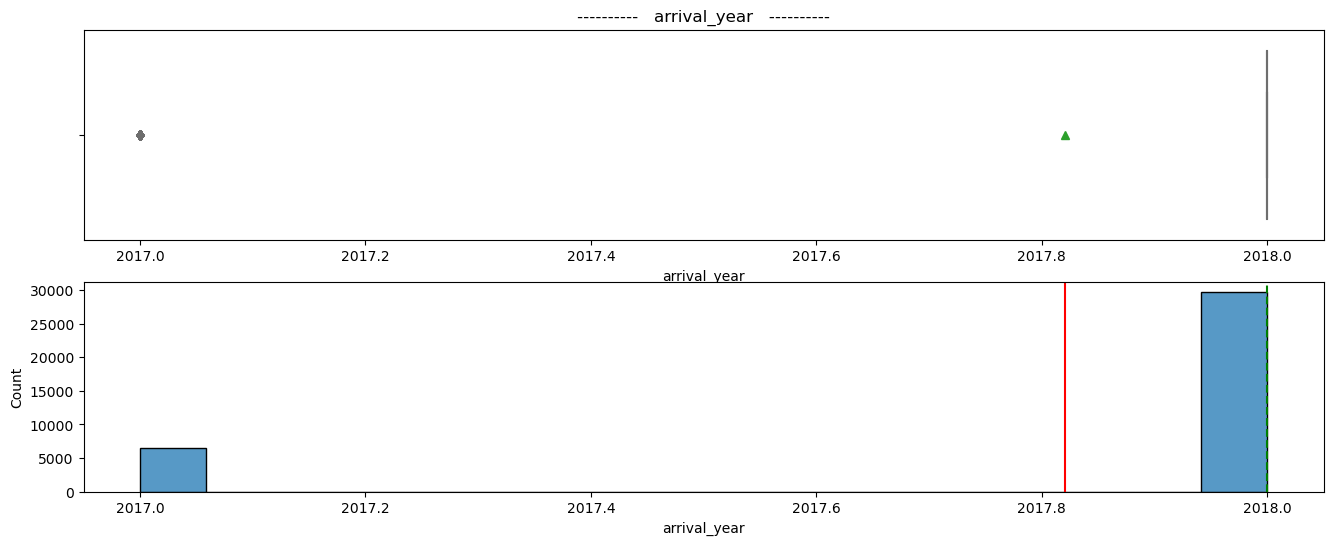

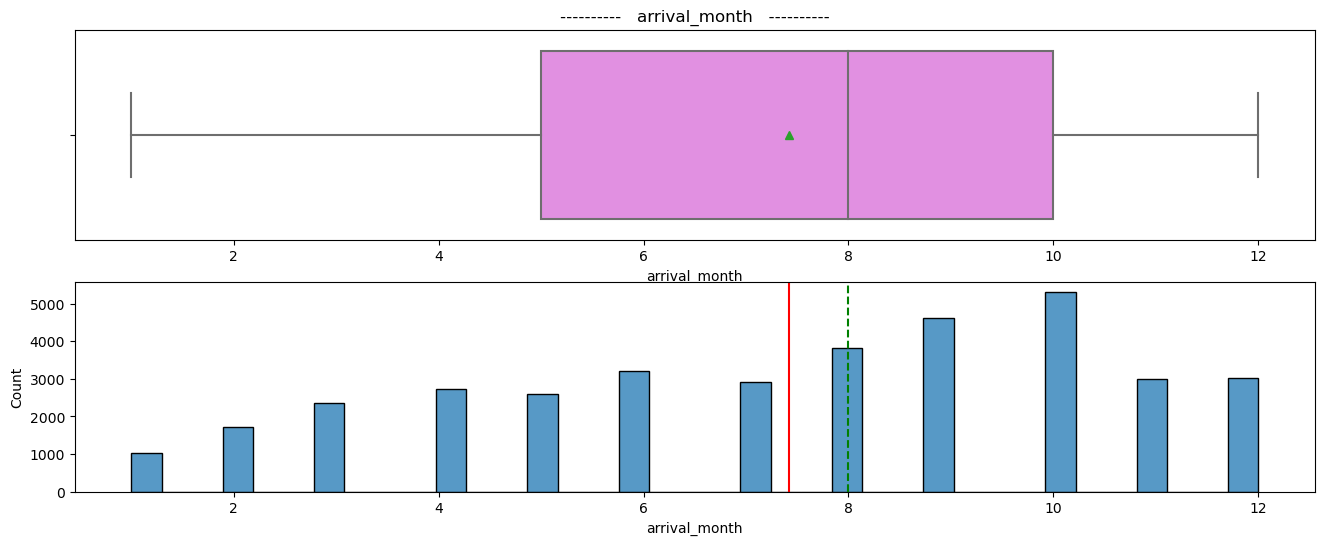

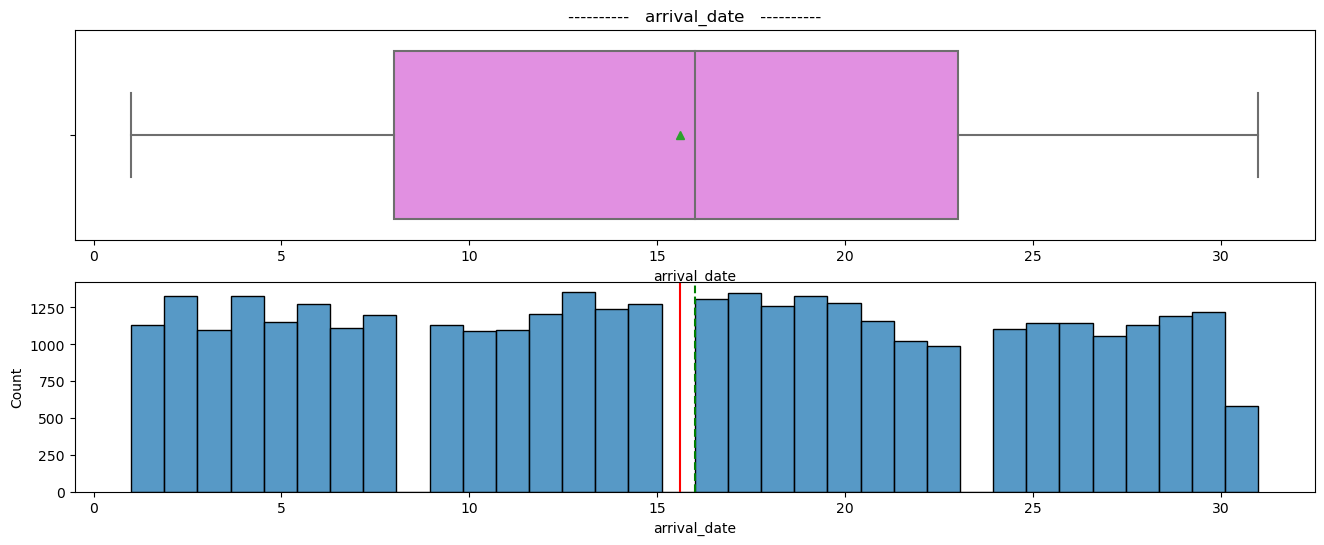

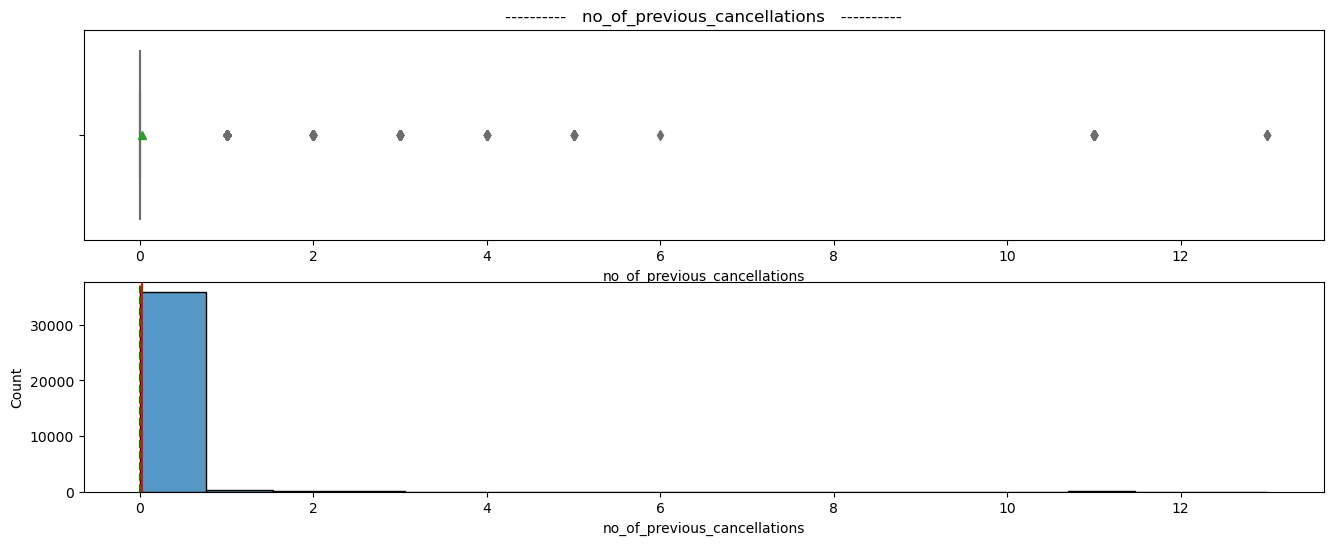

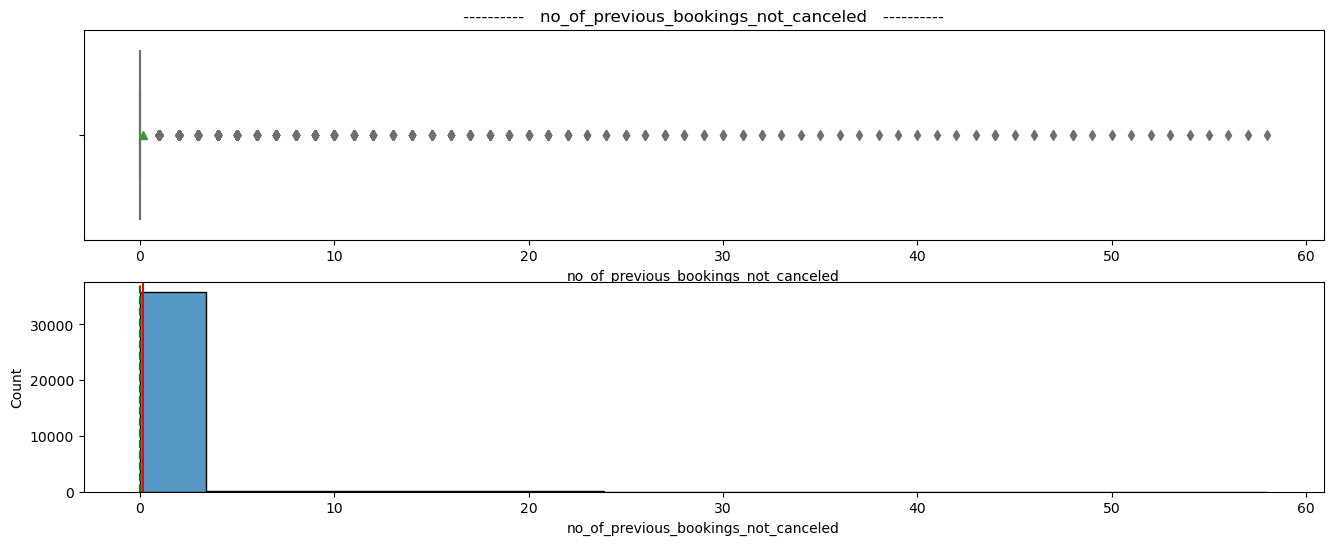

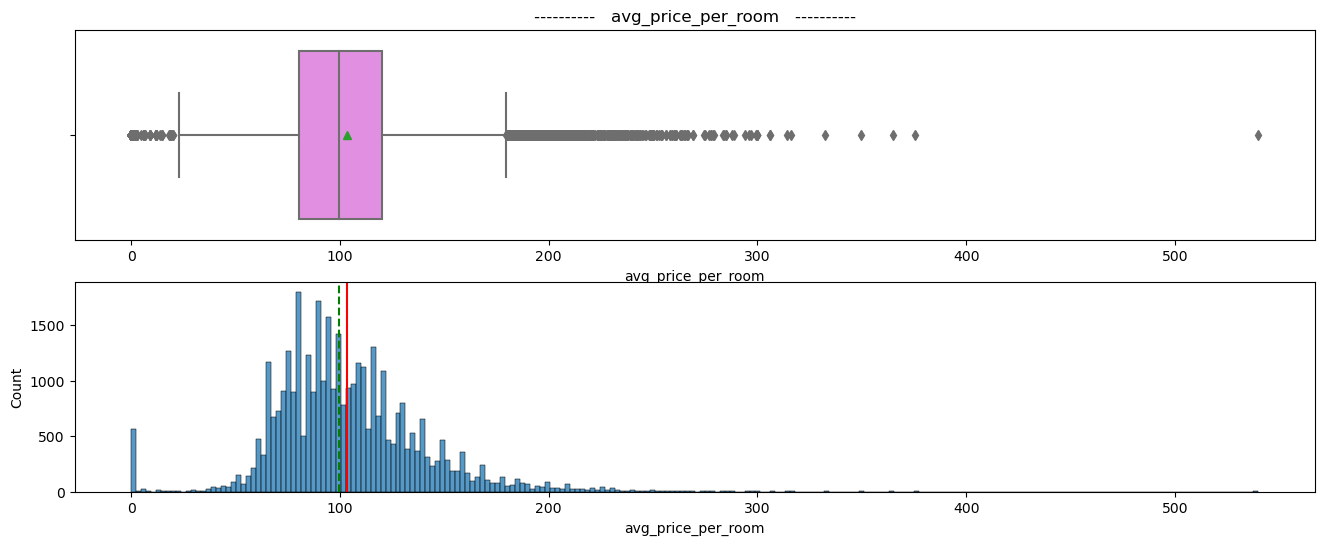

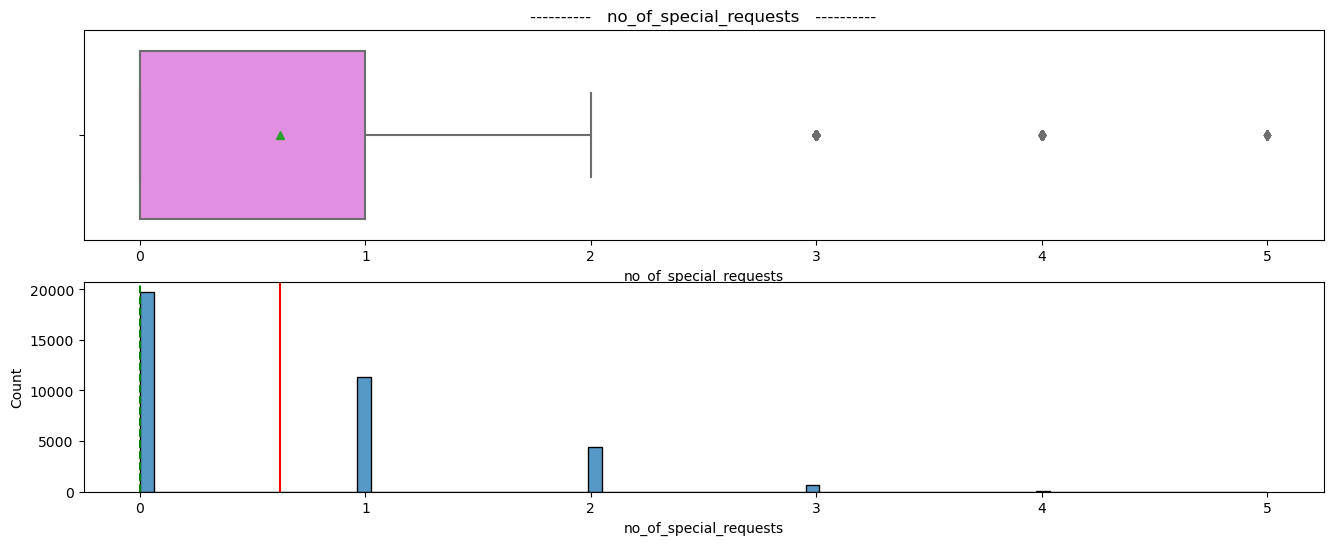

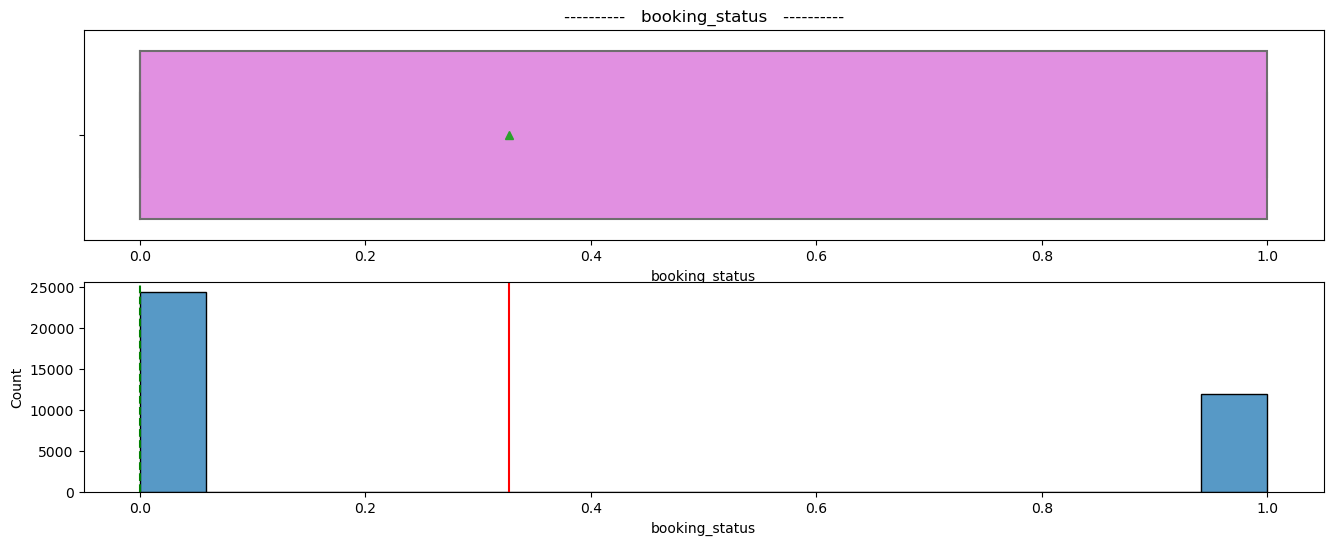

In [8]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for col in num_col:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=df, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=df, x=col)
    plt.axvline(df[col].mean(), color="red", linestyle="-")
    plt.axvline(df[col].median(), color="green", linestyle="--")
    plt.show()

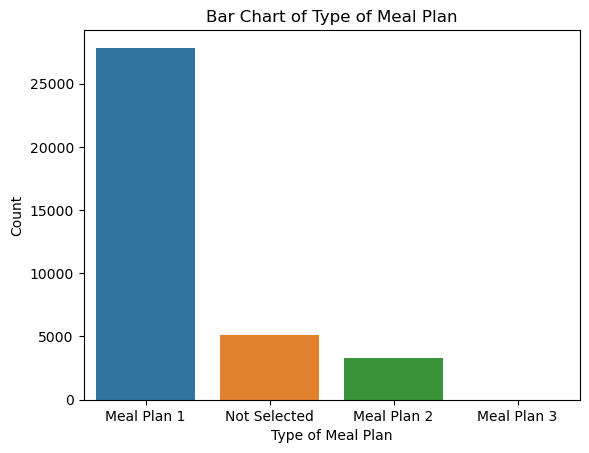

In [8]:
sns.countplot(x='type_of_meal_plan', data=df)
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Bar Chart of Type of Meal Plan')
plt.show()

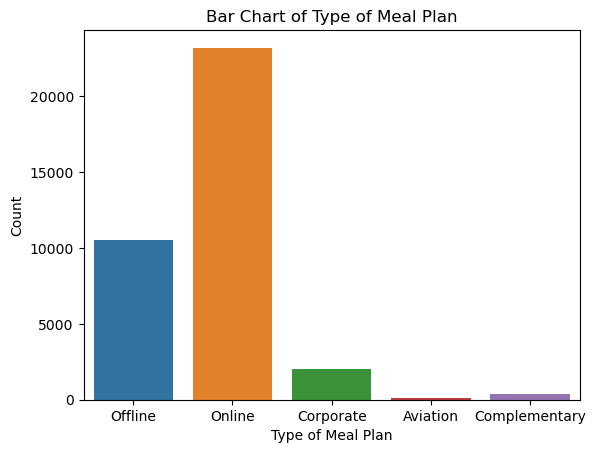

In [9]:
sns.countplot(x='market_segment_type', data=df)
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Bar Chart of Type of Meal Plan')
plt.show()

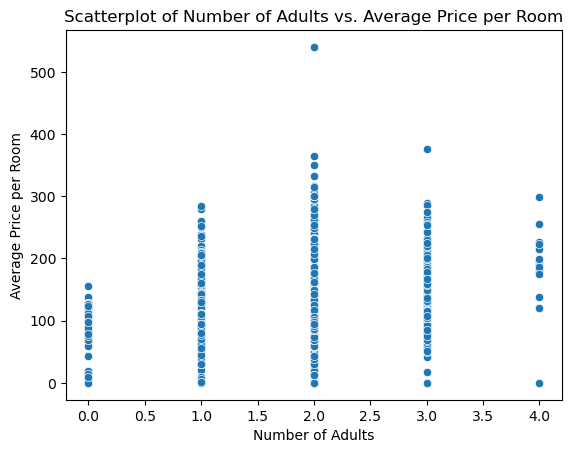

In [10]:
# Plot a scatterplot of the 'no_of_adults' and 'avg_price_per_room' variables
sns.scatterplot(x='no_of_adults', y='avg_price_per_room', data=df)
plt.xlabel('Number of Adults')
plt.ylabel('Average Price per Room')
plt.title('Scatterplot of Number of Adults vs. Average Price per Room')
plt.show()


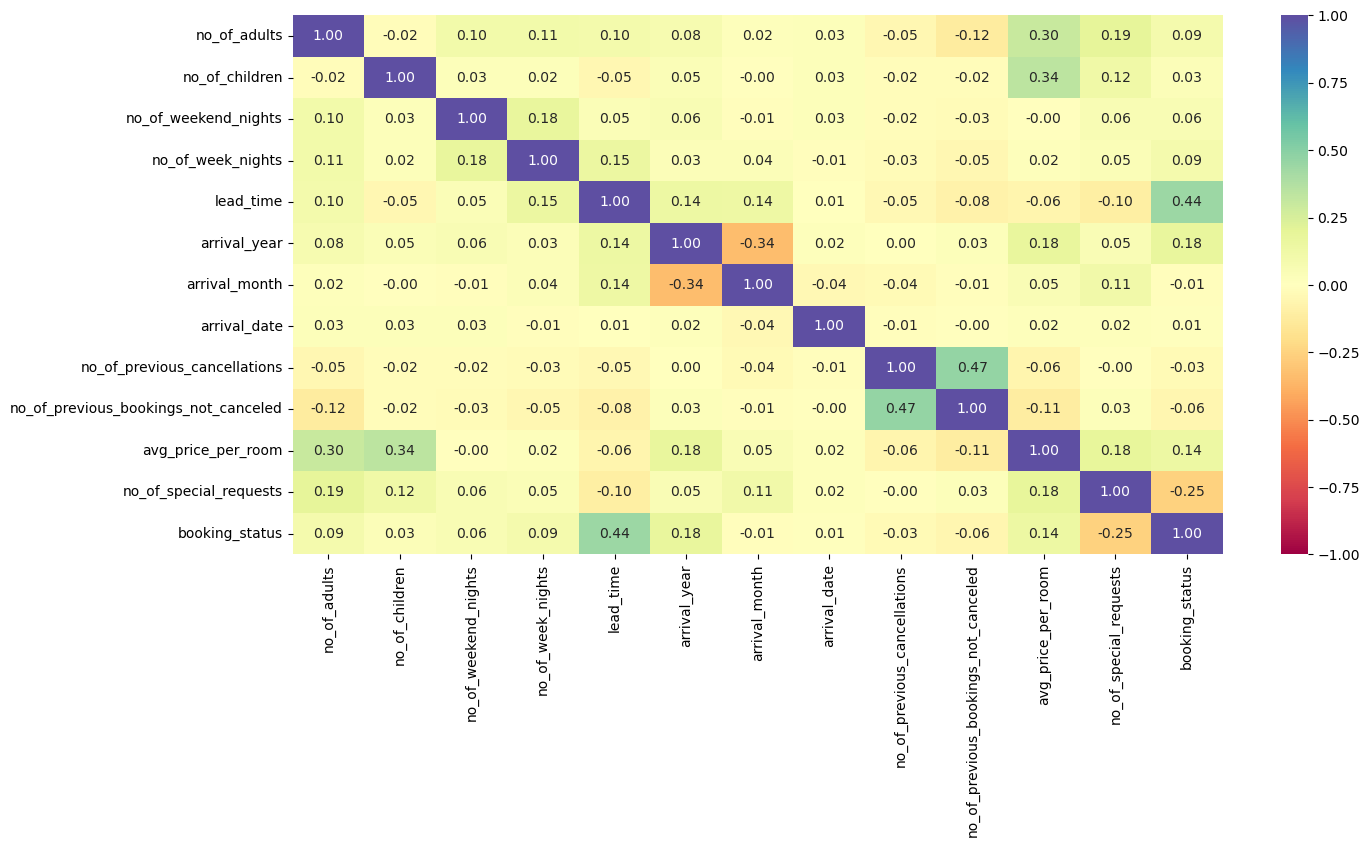

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## 2) Perform Data Preprocessing (10 points)

* Things to consider:
- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [12]:
df=df.drop(['Booking_ID'],axis=1)

In [13]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [14]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

          lead_time  arrival_year  arrival_month  arrival_date  \
count  36275.000000  36275.000000   36275.000000  36275.000000   
mean      85.232557   2017.820427       7.423653     15.596995   
std       85.930817      0.383836       3.069894      8.740447   
min        0.000000   2017.000000       1.000000      1.000000   
25%       17.000000   2018.000000       5.000000      8.000000   
50%       57.000000   2018.000000       8.000000     16.000000   
75%      126.000000   2018.000000      10.000000     23.000000   
max      443.000000   2018.000000      12.000000     31.000000   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                  36275.000000                          36275.000000   
mean                       0.023349                              0.153411   
std                        0.368331                              1.754171   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.000000                              0.000000   
75%                        0.000000                              0.000000   
max                       13.000000                             58.000000   

       avg_price_per_room  no_of_special_requests  booking_status  
count        36275.000000            36275.000000    36275.000000  
mean           103.423539                0.619655        0.327636  
std             35.089424                0.786236        0.469358  
min              0.000000                0.000000        0.000000  
25%             80.300000                0.000000        0.000000  
50%             99.450000                0.000000        0.000000  
75%            120.000000                1.000000        1.000000  
max            540.000000                5.000000        1.000000

In [15]:
#Q1 = df['avg_price_per_room'].quantile(0.25)
#Q3 = df['avg_price_per_room'].quantile(0.75)
#IQR = Q3 - Q1

# identify outliers using the IQR method
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#df = df[(df['avg_price_per_room'] >= lower_bound) & (df['avg_price_per_room']<= upper_bound)]

In [16]:
df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan required_car_parking_space room_type_reserved  \
0           Meal Plan 1                          0        Room_Type 1   
1          Not Selected                          0        Room_Type 1   
2           Meal Plan 1                          0        Room_Type 1   
3           Meal Plan 1                          0        Room_Type 1   
4          Not Selected                          0        Room_Type 1   
...                 ...                        ...                ...   
36270       Meal Plan 1                          0        Room_Type 4   
36271       Meal Plan 1                          0        Room_Type 1   
36272       Meal Plan 1                          0        Room_Type 1   
36273      Not Selected                          0        Room_Type 1   
36274       Meal Plan 1                          0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4             48          2018              4            11   
...          ...           ...            ...           ...   
36270         85          2018              8             3   
36271        228          2018             10            17   
36272        148          2018              7             1   
36273         63          2018              4            21   
36274        207          2018             12            30   

      market_segment_type repeated_guest  no_of_previous_cancellations  \
0                 Offline              0                             0   
1                  Online              0                             0   
2                  Online              0                             0   
3                  Online              0                             0   
4                  Online              0                             0   
...                   ...            ...                           ...   
36270              Online              0                             0   
36271              Online              0                             0   
36272              Online              0                             0   
36273              Online              0                             0   
36274             Offline              0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0           

In [17]:
df["booking_status"].value_counts(normalize=True)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

## 3) Build a default Decision Tree model. Evaluate the performance of your default Decision Tree model on the training and the test data set? State your observation on whether the model is overfit/underfit. (5 points)

In [18]:
x=df.drop(["booking_status"],axis=1)
y=df["booking_status"]
x = pd.get_dummies(x)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)
print(x_train.shape, x_test.shape)

(29020, 32) (7255, 32)


In [20]:
# Checking class balance for whole data, train set, validation set, and test set
print("Target value ratio in y")
print(y.value_counts(normalize=True))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(normalize=True))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(normalize=True))
print("*" * 80)

Target value ratio in y
0    0.672364
1    0.327636
Name: booking_status, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.672364
1    0.327636
Name: booking_status, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.672364
1    0.327636
Name: booking_status, dtype: float64
********************************************************************************


In [21]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
plt.figure(figsize=(120, 120))
plot_tree(dt, feature_names=x_train.columns.to_list(), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [ ]:
#performance on the training dataset
print('Evaluation metrics on the training dataset')
dt_train_perf = model_performance_classification_sklearn(dt, x_train, y_train, threshold=0.5)
display(dt_train_perf)

#performance on the testing dataset
print('Evaluation metrics on the testing dataset')
dt_test_perf = model_performance_classification_sklearn(dt, x_test, y_test, threshold=0.5)
display(dt_test_perf)

Based on the provided evaluation metrics, the default Decision Tree model appears to be overfitting the training data. The model has achieved a very high accuracy of 0.993999 on the training dataset, but its accuracy on the testing dataset is only 0.865818. The difference in accuracy between the training and testing datasets suggests that the model is not able to generalize well to new data and is overfitting.

Similarly, the other evaluation metrics such as recall, precision, and F1 score are higher on the training dataset than on the testing dataset, which further indicates overfitting. The AUC score on the testing dataset is also lower than that on the training dataset, which suggests that the model's performance on the testing dataset is worse than on the training dataset.

## 4) Tune the hyperparameters for the Decision tree and find the optimal set of hyperparamter. Use GridSearchCV technique. Use F1 score as your main scorer for the optimization. (10 points)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier().get_params()

In [ ]:
%%time

# Choose the type of classifier. 
dt1 = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    # The maximum depth of the tree. If None, then nodes 
    # are expanded until all leaves are pure or until all leaves 
    # contain less than min_samples_split samples.
    "max_depth": np.arange(3, 9),
    # The minimum number of samples required to split an internal node
    "min_samples_split": [5, 10, 30, 50, 70],
    # The minimum number of samples required to be at a leaf node
    "min_samples_leaf": [5, 10, 15, 20],
    # The number of features to consider when looking for the best split
    "max_features": ['auto', 'sqrt', 'log2'],
    # Grow a tree with max_leaf_nodes in best-first fashion
    "max_leaf_nodes": [10, 25, 50, 100],
    # Weights associated with classes
    "class_weight": [{0:0.1, 1:0.9}, {0:0.05, 1:0.95}, {0:0.2, 1:0.8}]
    
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj_dt1 = GridSearchCV(dt1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj_dt1 = grid_obj_dt1.fit(x_train, y_train)

# Print the best combination of parameters
grid_obj_dt1.best_params_

In [86]:
# use the best combination of parameters to train the model
dt1_tuned = DecisionTreeClassifier(
            min_samples_split = grid_obj_dt1.best_params_['min_samples_split'],
            min_samples_leaf = grid_obj_dt1.best_params_['min_samples_leaf'],
            max_leaf_nodes = grid_obj_dt1.best_params_['max_leaf_nodes'],
            max_features = grid_obj_dt1.best_params_['max_features'],
            max_depth = grid_obj_dt1.best_params_['max_depth'],
            class_weight = grid_obj_dt1.best_params_['class_weight'],
            random_state = 42
)

# Fit the best model to the data.
dt1_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       max_features='auto', max_leaf_nodes=100,
                       min_samples_leaf=5, min_samples_split=70,
                       random_state=42)

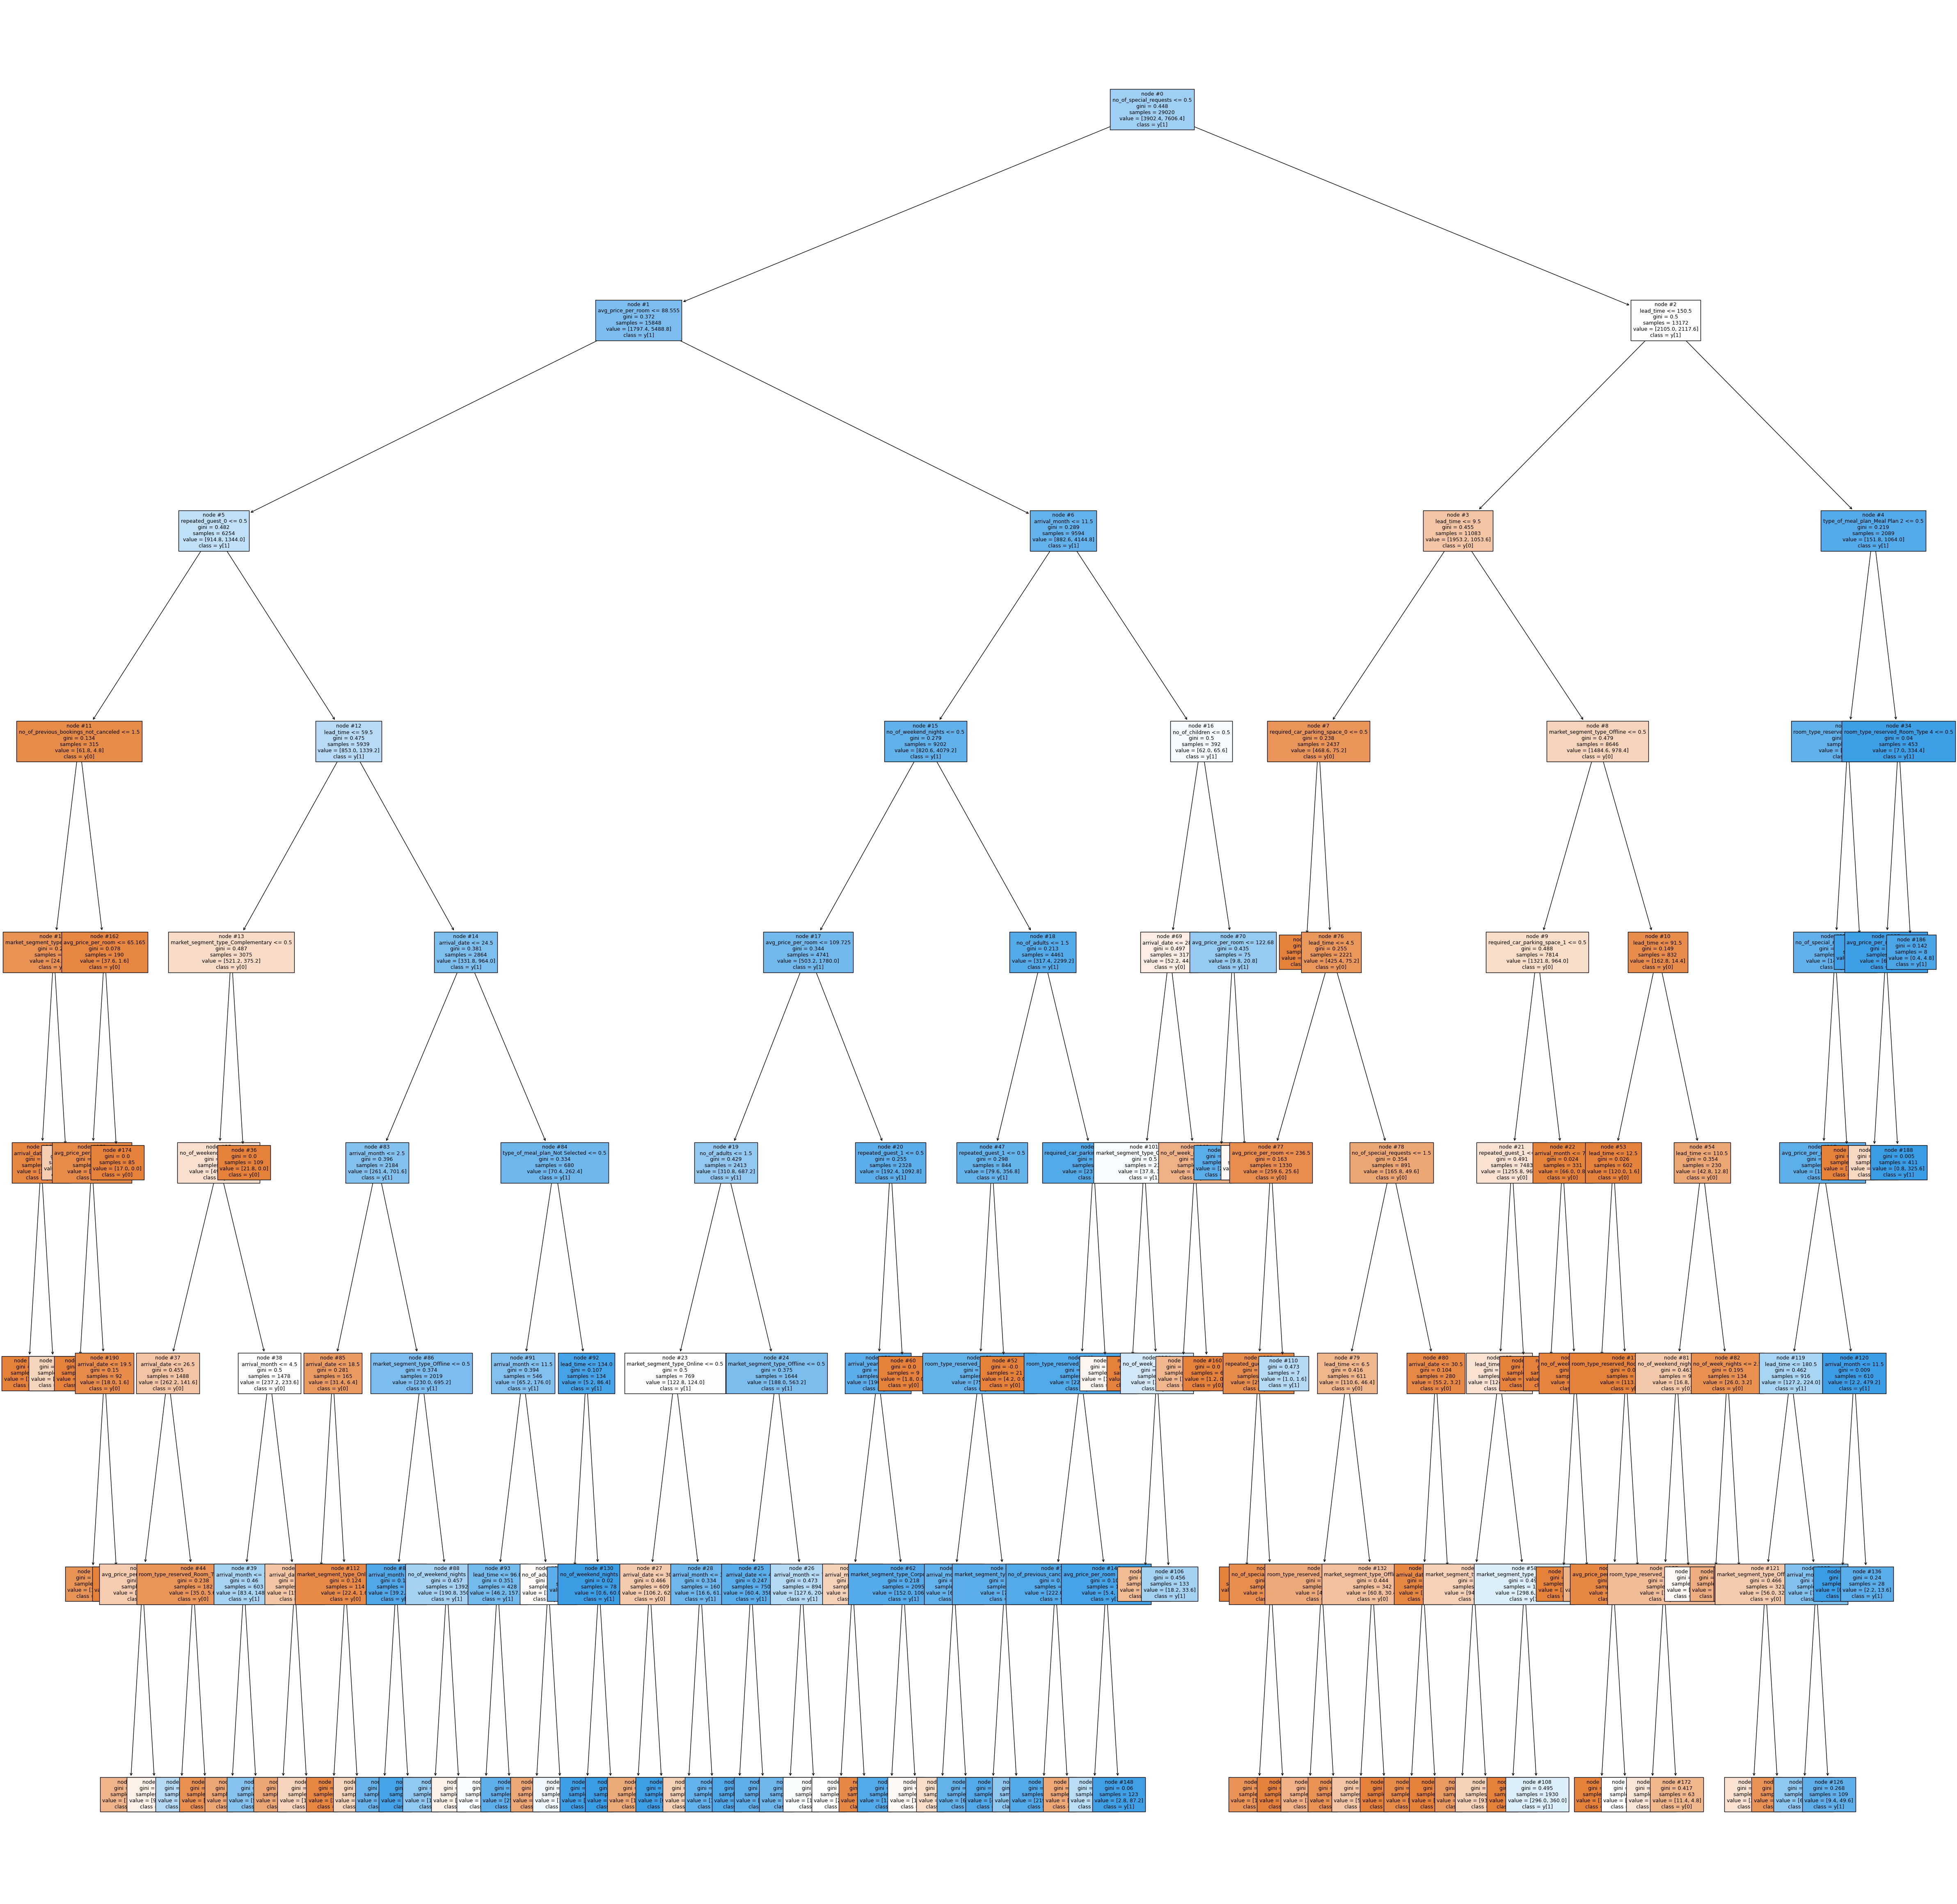

Wall time: 5.72 s


In [87]:
%%time
plt.figure(figsize=(60, 60))
plot_tree(dt1_tuned, feature_names=x_train.columns.to_list(), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [88]:
# model performance on the training dataset
print('Evaluation metrics on the training dataset')
dt1_tuned_train_perf = model_performance_classification_sklearn(dt1_tuned, x_train, y_train, threshold=0.5)
display(dt1_tuned_train_perf)

# model performance on the testing dataset
print('Evaluation metrics on the testing dataset')
dt1_tuned_test_perf = model_performance_classification_sklearn(dt1_tuned, x_test, y_test, threshold=0.5)
display(dt1_tuned_test_perf)

Evaluation metrics on the training dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1      AUC
0  0.719469            0.75415  0.854754   0.545913  0.666284  0.84517

Evaluation metrics on the testing dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1       AUC
0  0.710958           0.746769  0.850652   0.537194  0.658525  0.841528

## 5) Train a new decision tree with the optimal hyperparameter that you found above and evaluate the performance of the model on the training and the testing dataset. (5 points)

The performance of the model on the training dataset has decreased compared to the default decision tree model, which indicates that the model is not overfitting the training data anymore.
However, the performance of the model on the testing dataset has also decreased compared to the default model, which indicates that the model may still be overfitting to some extent.
The balanced accuracy and AUC scores are relatively high, indicating that the model is able to distinguish between the positive and negative classes reasonably well.
The precision score is low compared to the recall score, indicating that the model may be biased towards predicting the positive class.

## 6) Tune the hyperparameters for the decision tree and find the optimal set of hyperparamter. Use RandomizedSearchCV technique. Use F1 score as your main scorer for the optimization. (10 points)

In [89]:
%%time

# Choose the type of classifier. 
dt2 = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    # The maximum depth of the tree. If None, then nodes 
    # are expanded until all leaves are pure or until all leaves 
    # contain less than min_samples_split samples.
    "max_depth": np.arange(3, 9),
    # The minimum number of samples required to split an internal node
    "min_samples_split": [5, 10, 30, 50, 70],
    # The minimum number of samples required to be at a leaf node
    "min_samples_leaf": [5, 10, 15, 20],
    # The number of features to consider when looking for the best split
    "max_features": ['auto', 'sqrt', 'log2'],
    # Grow a tree with max_leaf_nodes in best-first fashion
    "max_leaf_nodes": [10, 25, 50, 100],
    # Weights associated with classes
    "class_weight": [{0:0.1, 1:0.9}, {0:0.05, 1:0.95}, {0:0.2, 1:0.8}]
    
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_obj_dt2 = RandomizedSearchCV(dt2, parameters, n_iter=10, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

rand_obj_dt2 = rand_obj_dt2.fit(x_train, y_train)

# Print the best combination of parameters
rand_obj_dt2.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 412 ms


{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 100,
 'max_features': 'auto',
 'max_depth': 6,
 'class_weight': {0: 0.2, 1: 0.8}}

In [90]:
# # use the best combination of parameters to train the model
dt2_tuned = DecisionTreeClassifier(
            min_samples_split = rand_obj_dt2.best_params_['min_samples_split'],
            min_samples_leaf = rand_obj_dt2.best_params_['min_samples_leaf'],
            max_leaf_nodes = rand_obj_dt2.best_params_['max_leaf_nodes'],
            max_features = rand_obj_dt2.best_params_['max_features'],
            max_depth = rand_obj_dt2.best_params_['max_depth'],
            class_weight = rand_obj_dt2.best_params_['class_weight'],
            random_state = 42
)

# Fit the best model to the data.
dt2_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       max_features='auto', max_leaf_nodes=100,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

## 7) Train a new decision tree with the optimal hyperparameter that you found above and evaluate the performance of the model on the training and the testing dataset. (5 points)

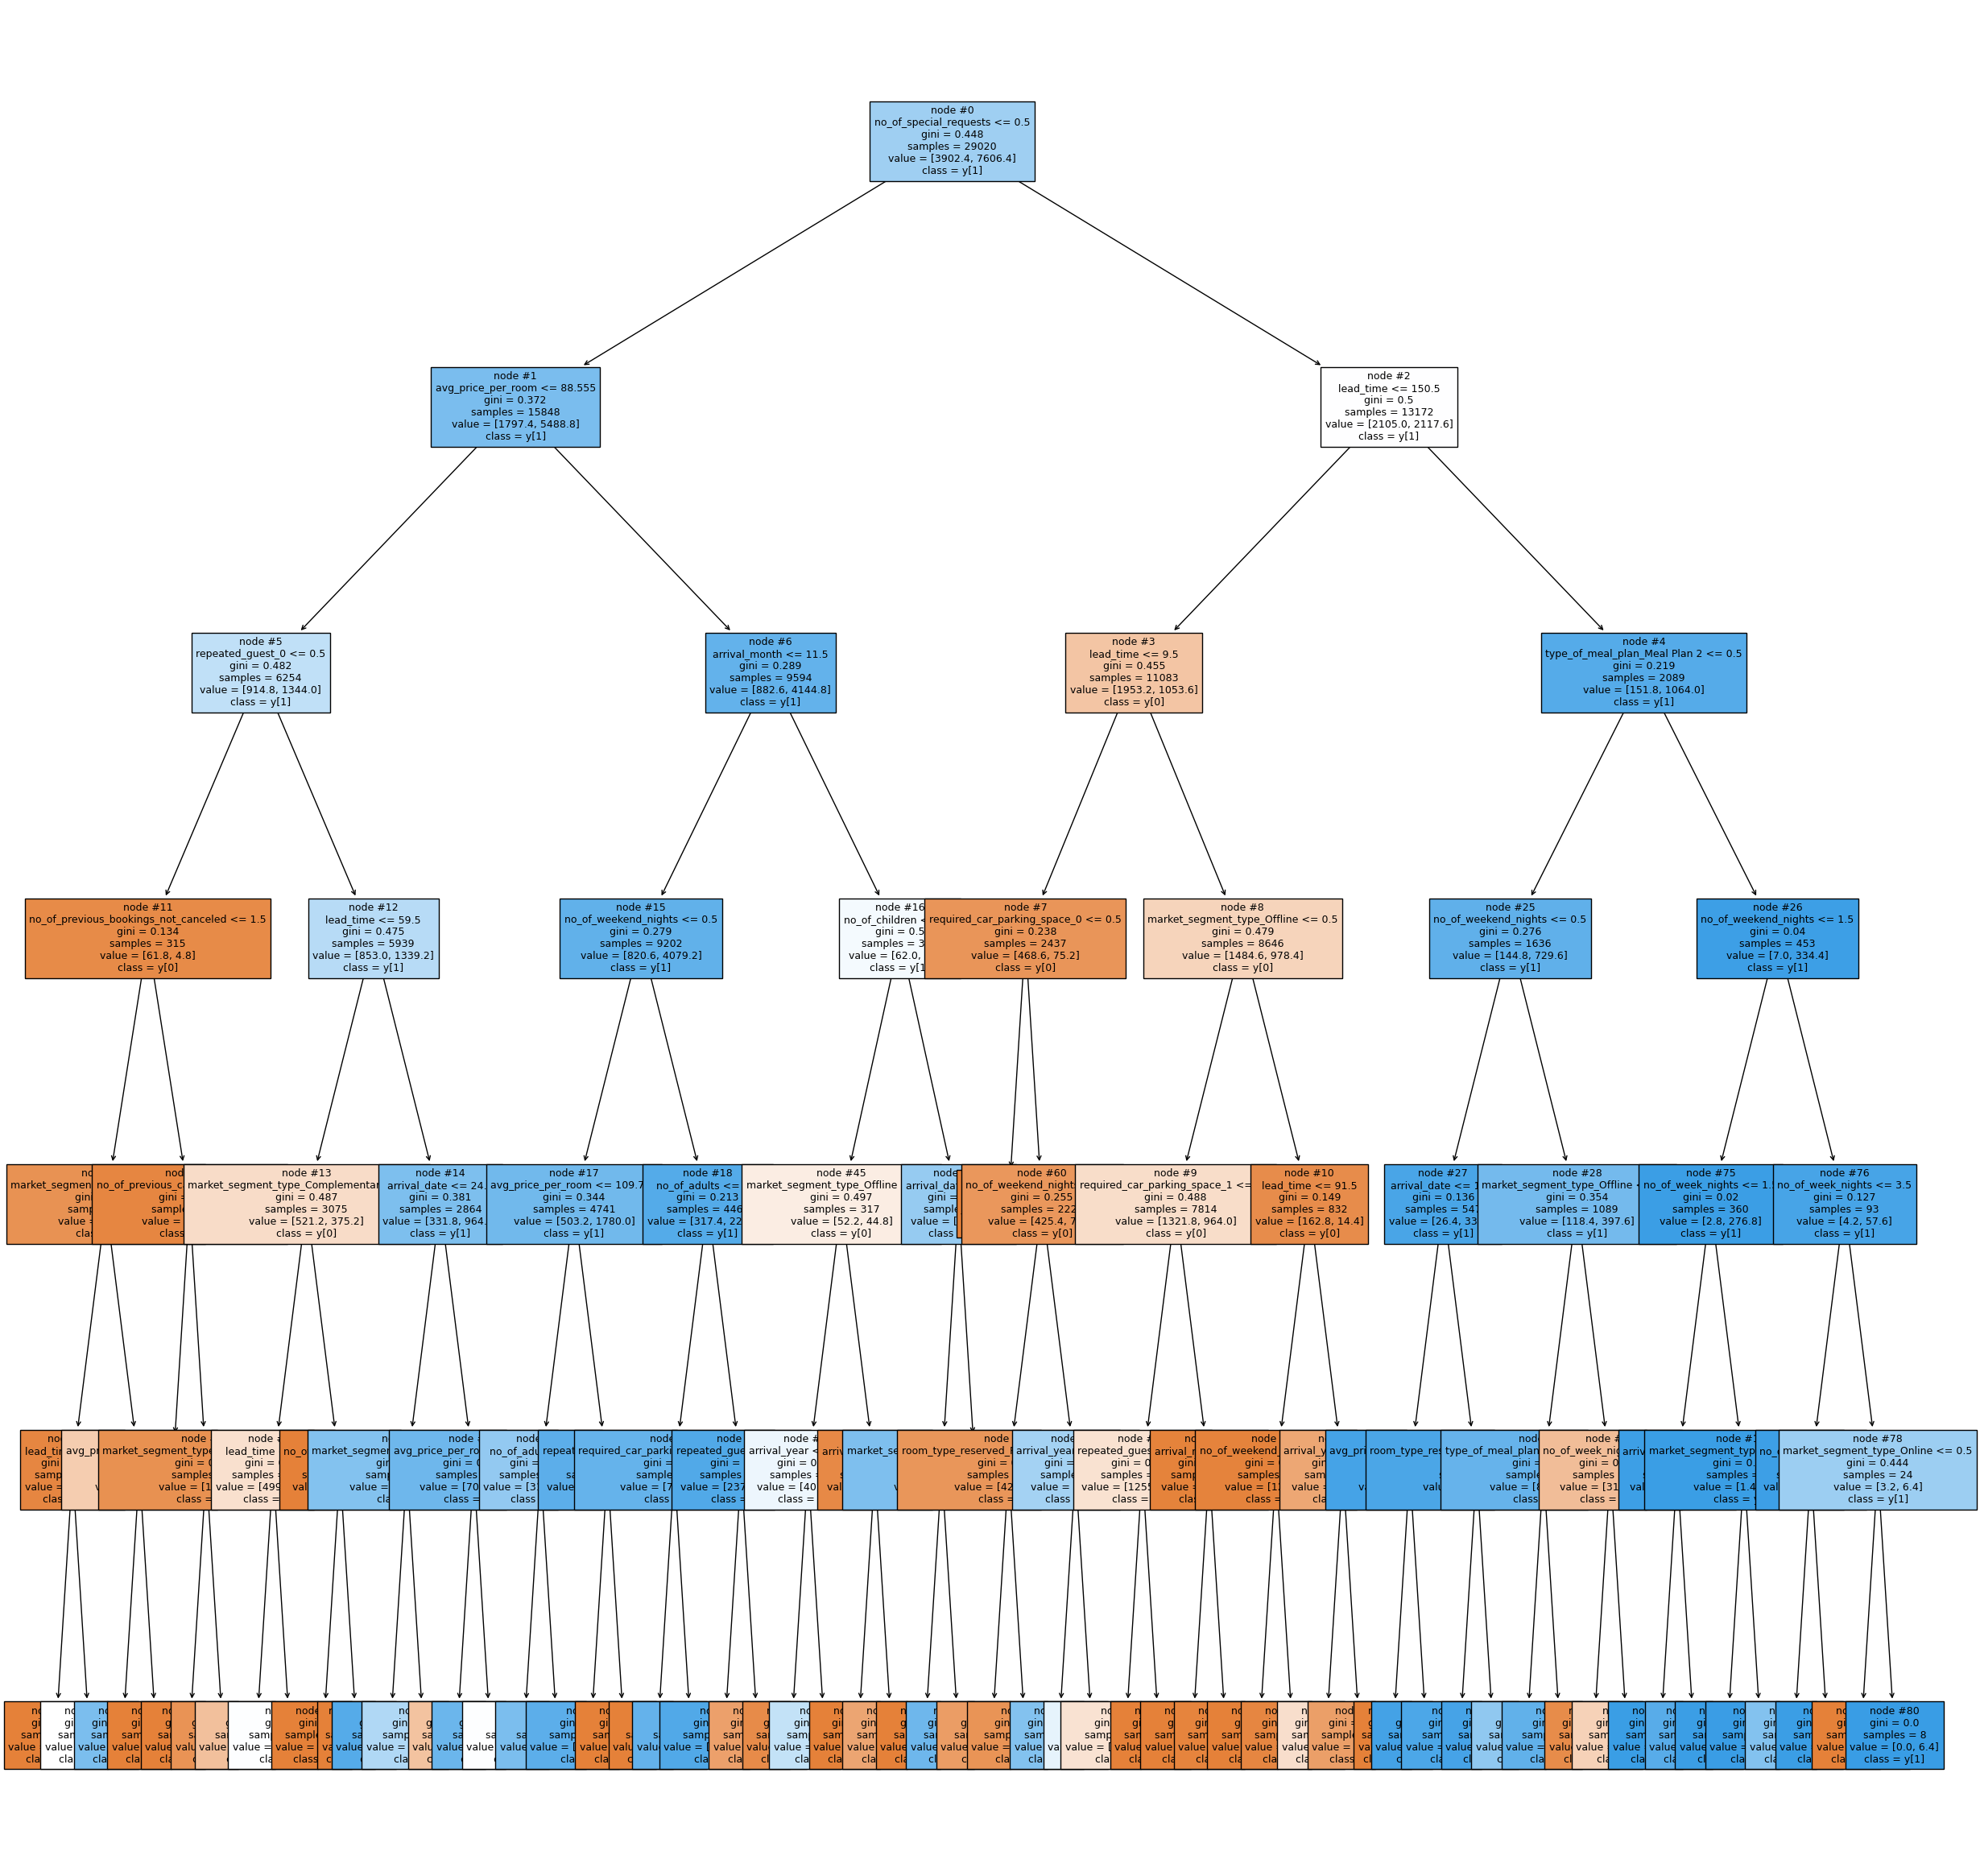

Wall time: 3.18 s


In [91]:
%%time
plt.figure(figsize=(30, 30))
plot_tree(dt2_tuned, feature_names=x_train.columns.to_list(), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [92]:
# model performance on the training dataset
print('Evaluation metrics on the training dataset')
dt2_tuned_train_perf = model_performance_classification_sklearn(dt2_tuned, x_train, y_train, threshold=0.5)
display(dt2_tuned_train_perf)

# model performance on the testing dataset
print('Evaluation metrics on the validation dataset')
dt2_tuned_test_perf = model_performance_classification_sklearn(dt2_tuned, x_test, y_test, threshold=0.5)
display(dt2_tuned_test_perf)

Evaluation metrics on the training dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1      AUC
0  0.682633           0.723629  0.842554   0.509476  0.634987  0.80926

Evaluation metrics on the validation dataset


Accuracy  Balanced Accuracy   Recall  Precision        F1     AUC
0  0.683115           0.722613  0.83719   0.509995  0.633859  0.8081

Based on the evaluation metrics, the performance of the new decision tree model with the optimal hyperparameters is worse than the previous model. The accuracy, balanced accuracy, recall, precision, F1 score, and AUC on both the training and validation datasets are lower than the previous model. This indicates that the new model is not a good fit for the data and is likely overfitting.

## 8) Build a default Random Forest model. Evaluate the performance of your default Random Forest model on the training and the test data set? State your observation on whether the model is overfit/underfit. (5 points)

In [93]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [94]:
# model performance on the training dataset
print('Evaluation metrics on the training dataset')
rf_train_perf = model_performance_classification_sklearn(rf, x_train, y_train, threshold=0.5)
display(rf_train_perf)

# model performance on the testing dataset
print('Evaluation metrics on the testing dataset')
rf_test_perf = model_performance_classification_sklearn(rf, x_test, y_test, threshold=0.5)
display(rf_test_perf)

Evaluation metrics on the training dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1       AUC
0  0.994452           0.992531  0.986958   0.996073  0.991495  0.999423

Evaluation metrics on the testing dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1       AUC
0  0.902688           0.879965  0.814051   0.879945  0.845717  0.951845

The default Random Forest model performs very well on both the training and testing datasets, with an accuracy of 0.994 and 0.902, respectively. The model is not overfitting, as the performance on the testing dataset is similar to the training dataset. The balanced accuracy, recall, precision, F1, and AUC are also high for both datasets. Overall, the default Random Forest model seems to be a good fit for the data.

## 9) Tune the hyperparameters for the Random forest and find the optimal set of hyperparamters. Use GridSearchCV technique. Use F1 score as your main scorer for the optimization. (10 points)

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [96]:
%%time

# Choose the type of classifier. 
rf2 = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {"n_estimators": [15,20,25],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced'],
    "max_depth":np.arange(3,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
rand_obj_rf2 = GridSearchCV(rf2, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

rand_obj_rf2 = rand_obj_rf2.fit(x_train, y_train)

# Print the best combination of parameters
rand_obj_rf2.best_params_

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Wall time: 2min 18s


{'class_weight': 'balanced',
 'max_depth': 4,
 'max_features': 0.4000000000000001,
 'max_samples': 0.4,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 6,
 'n_estimators': 15}

In [97]:
# use the best combination of parameters to train the model
rf2_tuned = RandomForestClassifier(
    n_estimators = rand_obj_rf2.best_params_['n_estimators'],
    min_samples_leaf = rand_obj_rf2.best_params_['min_samples_leaf'],
    min_impurity_decrease = rand_obj_rf2.best_params_['min_impurity_decrease'],
    max_samples = rand_obj_rf2.best_params_['max_samples'],
    max_features = rand_obj_rf2.best_params_['max_features'],
    max_depth = rand_obj_rf2.best_params_['max_depth'],
    class_weight = rand_obj_rf2.best_params_['class_weight'],
    random_state = 42
)

# Fit the best model to the data.
rf2_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       max_features=0.4000000000000001, max_samples=0.4,
                       min_impurity_decrease=0.001, min_samples_leaf=6,
                       n_estimators=15, random_state=42)

## 10) Train a new random forest with the optimal hyperparameter that you found above and evaluate the performance of the model on the training and the testing dataset. (5 points)

In [98]:
# model performance on the training dataset
print('Evaluation metrics on the training dataset')
rf2_tuned_train_perf = model_performance_classification_sklearn(rf2_tuned, x_train, y_train, threshold=0.5)
display(rf2_tuned_train_perf)

# model performance on the testing dataset
print('Evaluation metrics on the testing dataset')
rf2_tuned_test_perf = model_performance_classification_sklearn(rf2_tuned, x_test, y_test, threshold=0.5)
display(rf2_tuned_test_perf)

Evaluation metrics on the training dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1       AUC
0  0.817367           0.805867  0.772507   0.700725  0.734867  0.878358

Evaluation metrics on the testing dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1      AUC
0  0.811992           0.799578  0.763568   0.693542  0.726872  0.87225

The optimized Random Forest model has an accuracy of 81.74% on the training dataset and an accuracy of 81.20% on the testing dataset. The model seems to be neither overfit nor underfit, as the performance metrics on the training and testing datasets are fairly similar. The Balanced Accuracy is 80.59% on the training dataset and 79.96% on the testing dataset, which indicates that the model is able to classify both classes reasonably well. However, the Recall is relatively low, indicating that the model is not able to identify all the positive cases. The Precision is also relatively low, indicating that the model may be generating too many false positives. The F1 score is 73.49% on the training dataset and 72.69% on the testing dataset, which is an overall measure of the model's performance. The AUC is 87.84% on the training dataset and 87.23% on the testing dataset, which indicates that the model is able to separate the positive and negative cases reasonably well.

## 11) Tune the hyperparameters for the Random forest and find the optimal set of hyperparamters. Use RandomizedSearchCV technique. Use F1 score as your main scorer for the optimization. (10 points)

In [99]:
%%time

# Choose the type of classifier. 
rf1 = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    # number of trees in the forest
    "n_estimators": [15,20,25],
    # the minimum number of samples required to be at a leaf node
    "min_samples_leaf": np.arange(5, 10),
    # The number of features to consider when looking for the best split
    "max_features": np.arange(0.2, 0.7, 0.1),
    # If bootstrap is True (default), the number of samples to draw from X to train each base estimator.
    "max_samples": np.arange(0.3, 0.7, 0.1),
    # Weights associated with classes in the form
    "class_weight" : ['balanced', 'balanced_subsample'],
    # The maximum depth of the tree.
    "max_depth":np.arange(3,5),
    # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    "min_impurity_decrease":[0.001, 0.002, 0.003]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_obj_rf1 = RandomizedSearchCV(rf1, parameters, n_iter=10, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

rand_obj_rf1 = rand_obj_rf1.fit(x_train, y_train)

# Print the best combination of parameters
rand_obj_rf1.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1.03 s


{'n_estimators': 15,
 'min_samples_leaf': 9,
 'min_impurity_decrease': 0.001,
 'max_samples': 0.5,
 'max_features': 0.4000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced_subsample'}

In [100]:
# # use the best combination of parameters to train the model
rf1_tuned = RandomForestClassifier(
    n_estimators = rand_obj_rf1.best_params_['n_estimators'],
    min_samples_leaf = rand_obj_rf1.best_params_['min_samples_leaf'],
    min_impurity_decrease = rand_obj_rf1.best_params_['min_impurity_decrease'],
    max_samples = rand_obj_rf1.best_params_['max_samples'],
    max_features = rand_obj_rf1.best_params_['max_features'],
    max_depth = rand_obj_rf1.best_params_['max_depth'],
    class_weight = rand_obj_rf1.best_params_['class_weight'],
    random_state = 42
)

# Fit the best model to the data.
rf1_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       max_features=0.4000000000000001, max_samples=0.5,
                       min_impurity_decrease=0.001, min_samples_leaf=9,
                       n_estimators=15, random_state=42)

## 12) Train a new random forest with the optimal hyperparameter that you found above and evaluate the performance of the model on the training and the testing dataset. (5 points)

In [101]:
# model performance on the training dataset
print('Evaluation metrics on the training dataset')
rf1_tuned_train_perf = model_performance_classification_sklearn(rf1_tuned, x_train, y_train, threshold=0.5)
display(rf1_tuned_train_perf)

# model performance on the testing dataset
print('Evaluation metrics on the testing dataset')
rf1_tuned_test_perf = model_performance_classification_sklearn(rf1_tuned, x_test, y_test, threshold=0.5)
display(rf1_tuned_test_perf)

Evaluation metrics on the training dataset


Accuracy  Balanced Accuracy    Recall  Precision        F1       AUC
0  0.808649           0.796661  0.761885   0.687743  0.722918  0.864627

Evaluation metrics on the testing dataset


Accuracy  Balanced Accuracy   Recall  Precision        F1       AUC
0   0.80317           0.790322  0.75305    0.68035  0.714856  0.861015

The performance of the Random Forest model with tuned hyperparameters is slightly worse than the default model in terms of accuracy and balanced accuracy. However, the F1 score has improved for both the training and testing datasets, indicating better performance in terms of precision and recall. The model is still not overfitting as the performance on the training and testing datasets are similar. Overall, the Random Forest model with tuned hyperparameters is a better choice than the default model.

## 13) Compare all the models and decide the which model is the most appropriate one based on the F1 score metric. (10 points)

In [102]:
# training performance comparison
models_train_comp_df = pd.concat(
    [dt_train_perf.T, dt1_tuned_train_perf.T, dt2_tuned_train_perf.T,
     rf_train_perf.T, rf1_tuned_train_perf.T, rf2_tuned_train_perf.T], axis=1,
)
models_train_comp_df.columns = [
    'dt', 'dt1_tuned', 'dt2_tuned',
    'rf', 'rf1_tuned','rf2_tuned',
]

print("Training performance comparison:")
display(models_train_comp_df)

# testing performance comparison
models_test_comp_df = pd.concat(
    [dt_test_perf.T, dt1_tuned_test_perf.T, dt2_tuned_test_perf.T,
     rf_test_perf.T, rf1_tuned_test_perf.T, rf2_tuned_test_perf.T], axis=1,
)
models_test_comp_df.columns = [
    'dt', 'dt1_tuned', 'dt2_tuned',
    'rf', 'rf1_tuned','rf2_tuned',
]

print("Testing performance comparison:")
display(models_test_comp_df)

Training performance comparison:


dt  dt1_tuned  dt2_tuned        rf  rf1_tuned  \
Accuracy           0.994452   0.719469   0.682633  0.994452   0.808649   
Balanced Accuracy  0.992315   0.754150   0.723629  0.992531   0.796661   
Recall             0.986117   0.854754   0.842554  0.986958   0.761885   
Precision          0.996917   0.545913   0.509476  0.996073   0.687743   
F1                 0.991487   0.666284   0.634987  0.991495   0.722918   
AUC                0.999898   0.845170   0.809260  0.999423   0.864627   

                   rf2_tuned  
Accuracy            0.817367  
Balanced Accuracy   0.805867  
Recall              0.772507  
Precision           0.700725  
F1                  0.734867  
AUC                 0.878358

Testing performance comparison:


dt  dt1_tuned  dt2_tuned        rf  rf1_tuned  \
Accuracy           0.866437   0.710958   0.683115  0.902688   0.803170   
Balanced Accuracy  0.850204   0.746769   0.722613  0.879965   0.790322   
Recall             0.803113   0.850652   0.837190  0.814051   0.753050   
Precision          0.792116   0.537194   0.509995  0.879945   0.680350   
F1                 0.797577   0.658525   0.633859  0.845717   0.714856   
AUC                0.855863   0.841528   0.808100  0.951845   0.861015   

                   rf2_tuned  
Accuracy            0.811992  
Balanced Accuracy   0.799578  
Recall              0.763568  
Precision           0.693542  
F1                  0.726872  
AUC                 0.872250

Based on the F1 score metric, the most appropriate model is the Random Forest with the hyperparameters tuned using GridSearchCV (rf2_tuned), as it has the highest F1 score on the testing dataset among all the models compared. It also has a good balance of precision and recall, as well as high accuracy and AUC scores. However, it is important to note that the model is still not perfect and there is room for further improvement.

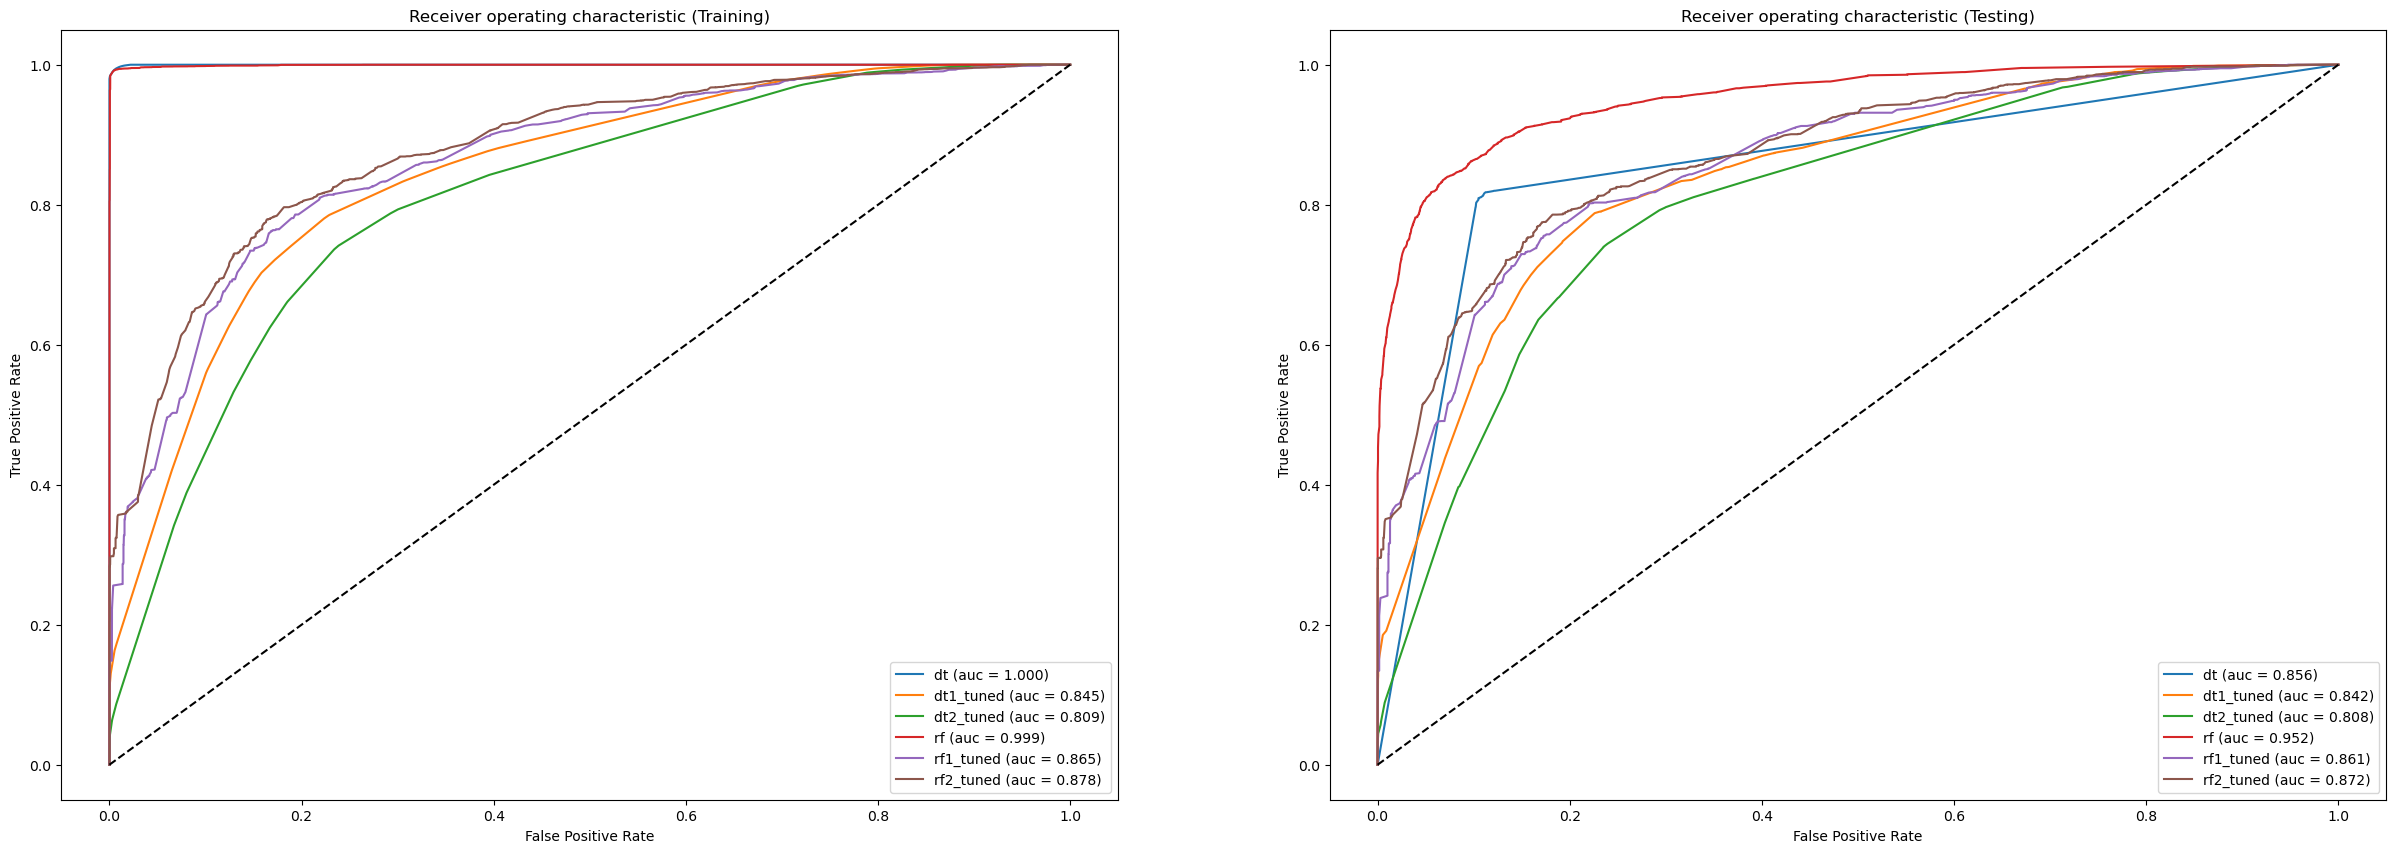

In [103]:
# ROC curve
model_names = ['dt', 'dt1_tuned', 'dt2_tuned', 'rf', 'rf1_tuned', 'rf2_tuned']
models = [dt, dt1_tuned, dt2_tuned, rf, rf1_tuned, rf2_tuned]
fpr_tpr_train = []
auc_train = []
fpr_tpr_test = []
auc_test = []
for i, model in enumerate(models):
    roc_auc_train = roc_auc_score(y_train, model.predict_proba(x_train)[:,1])
    fpr_train, tpr_train, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    fpr_tpr_train.append(fpr_train)
    fpr_tpr_train.append(tpr_train)
    auc_train.append('{} (auc = {:.3f})'.format(model_names[i], roc_auc_train))
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr_test, tpr_test, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    fpr_tpr_test.append(fpr_test)
    fpr_tpr_test.append(tpr_test)
    auc_test.append('{} (auc = {:.3f})'.format(model_names[i], roc_auc_test))

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(*fpr_tpr_train)
plt.legend(auc_train, loc="lower right")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Training)")
plt.subplot(1, 2, 2)
plt.plot(*fpr_tpr_test)
plt.legend(auc_test, loc="lower right")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (Testing)");